### 1. Author
Student Name: Pranjali Hande

Student ID: 220707639

### 2. Problem formulation

<b>Problem Statement: The problem is to predict whether the audio segment has been recorded in the Central, Eastern, or Western areas of London.</b>

Using the MLEnd London Sounds dataset, build a machine learning pipeline that takes an audio segment as input and predicts whether the audio segment has been recorded in the Central, Eastern, or Western area of London.

The MLEnd dataset is collected from different areas in London as below. 

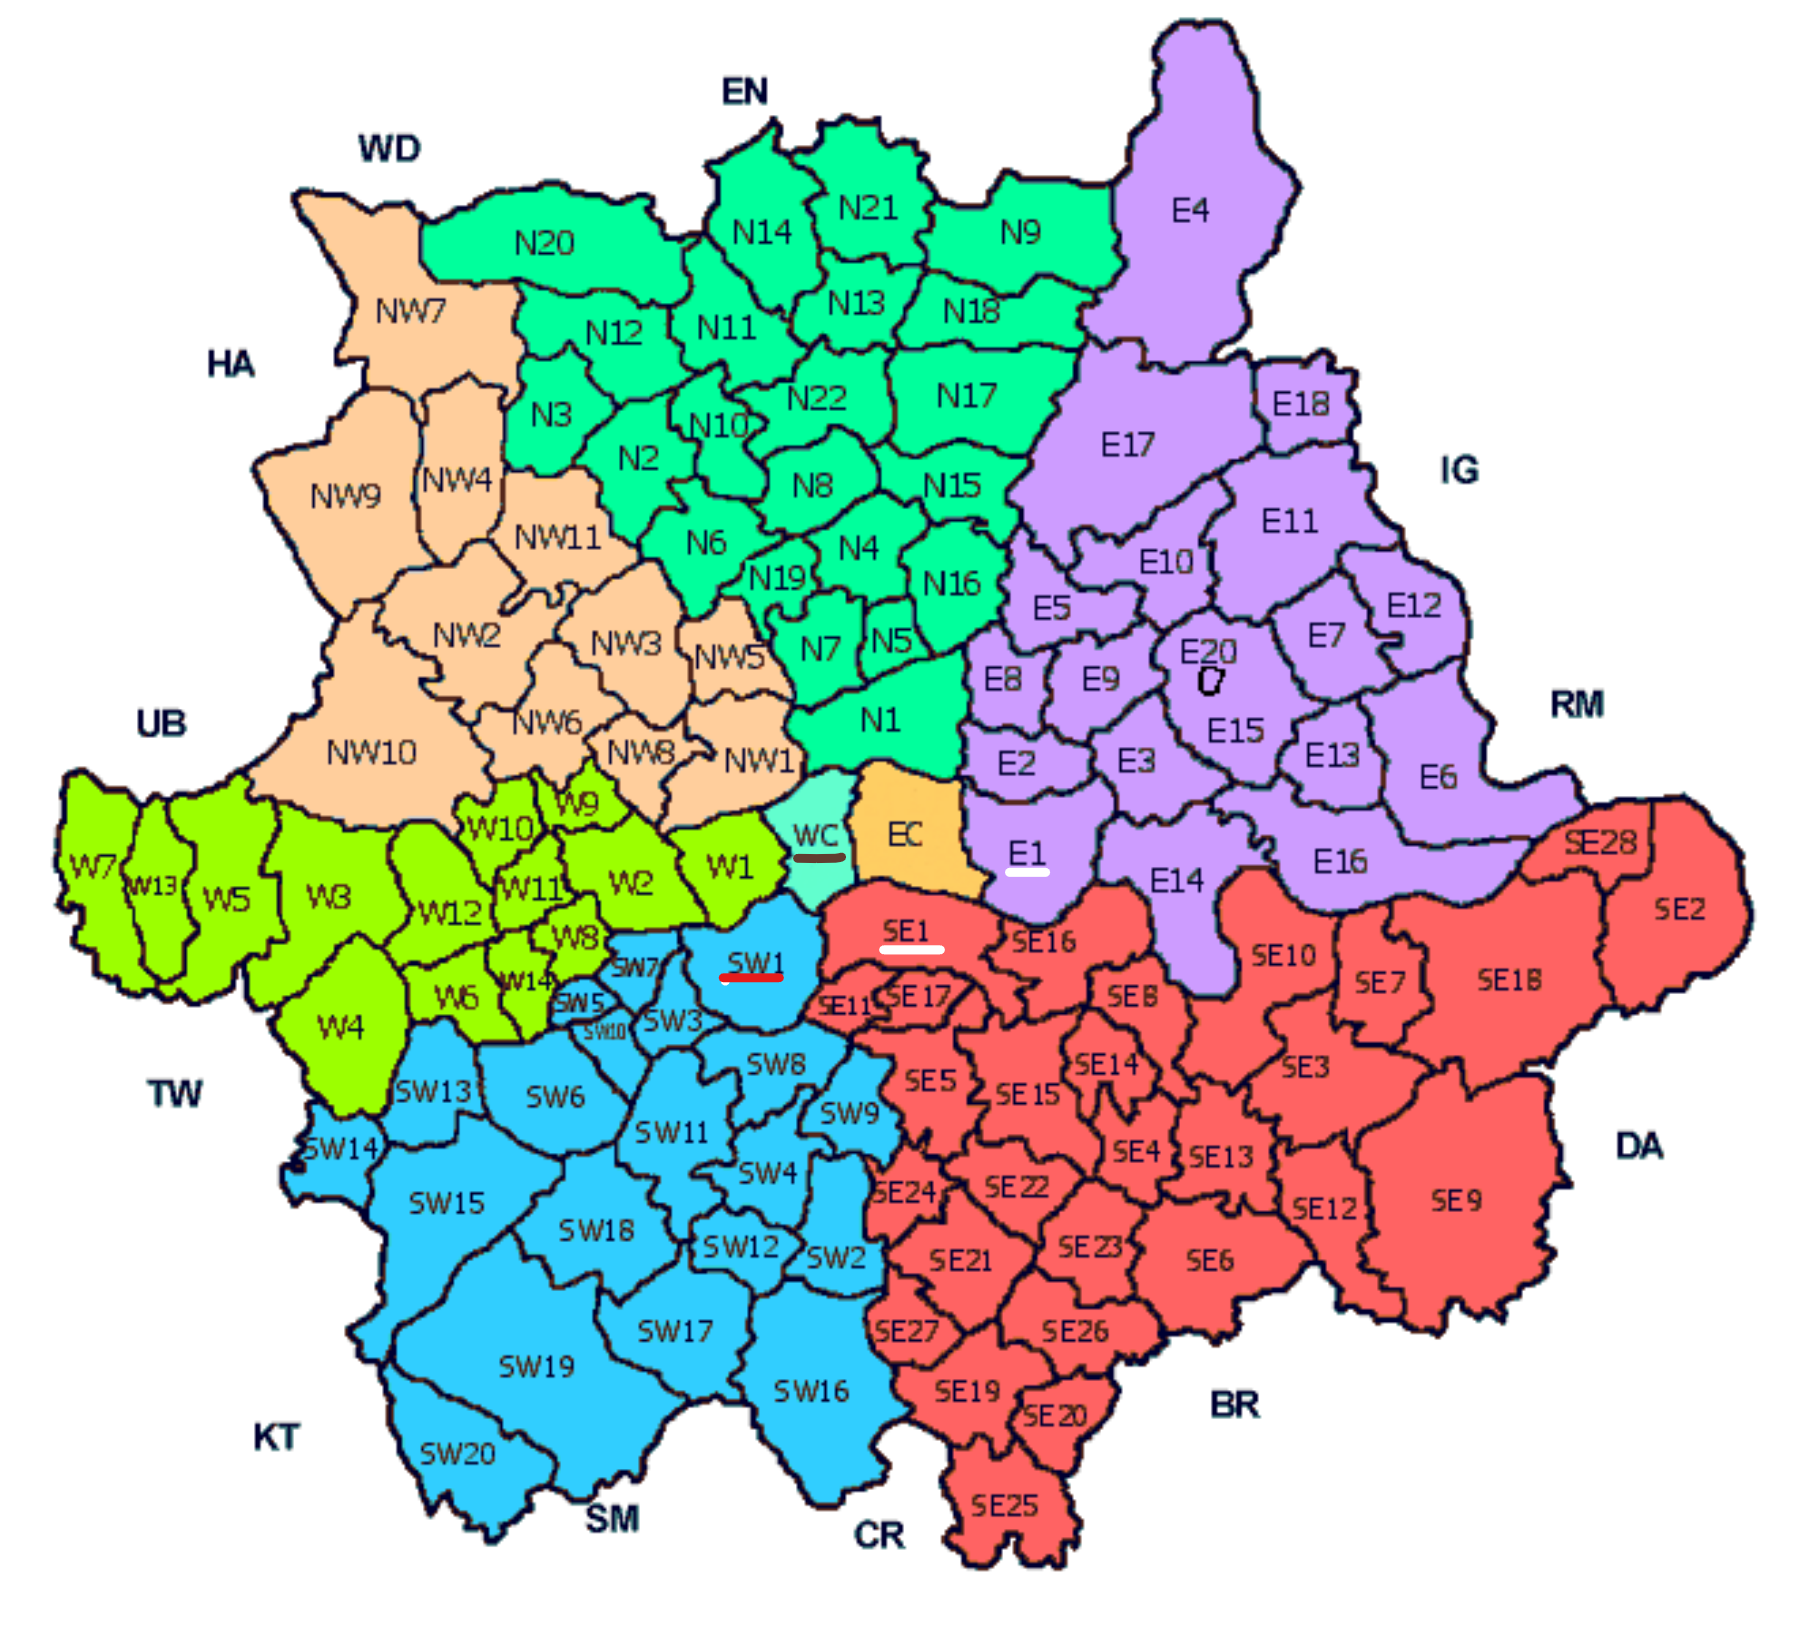


'british' = "WC", 
'westend' = "WC", 
'Euston' = "SW", 
'kensington' = "SW", 
'southbank' = "SE", 
'campus' = "E"


Areas are categorized based on London Postcodes for districts as shown above. These are further categorized into Central, Eastern, or Western areas of London. As all three categories have all kinds of audio for different spots, it’s interesting to understand how the classifier will be able to predict these 3 locations based on these recorded sounds.


### 3. Machine Learning pipeline

Stages of Machine Learning Pipeline:

<b> Input:</b> Audio files from MLE sound dataset (.wav files: It captures the closest mathematical representation of the original audio with no noticeable audio quality loss).

<b> Output:</b> Lable either Central, Eastern, or Western areas of London.

<b> Stage 1. Preprocess:</b> Collect the MLEnd Audio dataset samples (almost 2491). These Audio files are processed and transformed using python package Librosa. 

<b> Stage 2. Feature Extraction:</b> Several advanced features can be extracted and visualized using this library to these analyze signals. List multiple audio features as a predictors for the classifier and label are either Central, Eastern, or Western areas of London.

<b> Stage 3. Modelling:</b> 

   A. Normalize the input data (extracted features as predictors).
    
   B. Split the data into Train and test samples.
    
   C. Train classifer with train data.
    
   D. Predict labels for audio test data as indoors or outdoors from trained classifer.

<b> Stage 4. Validate Accuracy:</b> Compute Accuracy for the predictions. Perform Validation on Test dataset.

### 4. Transformation stage

Describe any transformations, such as feature extraction. Identify input and output. Explain why you have chosen this transformation stage.

This is the first stage in ML pipeline, where the input audio signals are processed and transformed. In this project we are using Librosa python package to transformed the audio data. There are several features that can be extracted using this library which can be used as a predictors to train a classifier. 

<b> In this stage, Audio signals are input and the extred features are output. </b> 

Below are some of the features which can be extrated from audio files.

<b> 1. Root-mean-square (RMS): </b> It refers to the total magnitude of the signal, which can be interpreted as the loudness or energy parameter of the audio file. 

   This feature can be usefull to be use as one of the predictors as it captures both the intensity and the smoothness of the sound. 

<b> 2. The spectral centroid: </b> It's the frequency based feature. It indicates the frequency at which the energy of the audio signal is centered. Spectral_centroid computes the spectral centroid for each frame in a the given signal. This is bacially a central tendency of the signal.

<b> 3. Spectral Bandwidth: </b> It's gives the difference between the upper and lower frequencies in audio signals. The sum of maximum deviation of the signal on both sides of the point is the bandwidth of the signal at that time frame.

As we are using Spectral Bandwidth and spectral centroid, this will help to cover the whole range of audio signal.
    
<b> 4. Mel-Frequency Cepstral Coefficients(MFCCs): </b> MFCC is most widley used for machine learning experiment involving audio files. These are the small set of features which concisely describe the overall shape of a spectral envelope. MFCC's models the characteristics of the human voice. 

   This approximates the human auditory system’s response more closely. Hence, can be used as one the predictors. Total 45 number of coomponents are used for MFCC.

### 5. Modelling
Describe the ML model(s) that you will build. Explain why you have chosen them.

In a multiclass classification, we train a classifier using training data and use classifier for classifying test data. There are many classifiers which can be used for classification such as:

1. Decision tree classifier
2. SVM (Support vector machine) classifier
3. KNN (k-nearest neighbors) classifier 
4. Random Forest Classifier

Out of them, as a part of this project will be using SVM as a classifier as it has the below advantages. All other classifiers are also tried and tested.

<b>SVM Classifiers:</b> Support Vectors Classifier tries to find the best hyperplane to separate the different classes by maximizing the distance between sample points and the hyperplane.

<b>1. High-Dimensional Data:</b>  SVM can handle High dimensional data. We are extracting many features from the audio signals which makes the database bigger and more complex.  Hence SVM will be helpful to use.

<b>2. Outliers have less influence in the SVM Algorithm:</b>  As outliers have less influence, there are fewer chances of skewing the results, as outliers affect the mean of the data. Thus, less influence of outliers will be helpful.

<b>3. Better Accuracy:</b> When comparing results with other classifiers, SVM provides better accuracy.

<b>4. Prevent Overfitting:</b> SVM generally does not suffer the condition of overfitting as it L2 Regularization feature which provides generalization capabilities that prevent overfitting.

<b>5. Handles non-linear data efficiently:</b> SVM can efficiently handle non-linear data using the Kernel trick. As our dataset is also non-linear it will help to get good predictions.



### 6. Methodology

Describe how you will train and validate your models, how model performance is assesssed (i.e. accuracy, confusion matrix, etc)

<b>1. Training a model: </b>As we have chose SVM as our model, we need to train SVM classifer in order to make predictions.
To train a classifier:

   A. We will use the extracted features as a predictors and Central/Western/Eastern area as a labels.
        
   B. These predictors and labels will be then divided into Train and Test data.
        
   C. SVM classifer will be train on training data and the validations will be performed on trained classfier using Test data.

    
<b>2. Validations:</b> Once predictions are made, to understand how our models works we can use below measures to understand the qualities of predictions:

   <b>A. Accuracy:</b> Computed by comparing the set of labels predicted to the corresponding set of actual labels.
    
   <b>B. Precision:</b> It's the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is the ability of the classifier not to label as positive a sample that is negative.
    
   <b>C. Recall:</b> The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.
    
   <b>D. F-Score:</b> The F1 score can be interpreted as a harmonic mean of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0. The relative contribution of precision and recall to the F1 score are equal. The formula for the F1 score is: F1 = 2 * (precision * recall) / (precision + recall)
   
   <b>E. Confusion Matrix:</b> Compute confusion matrix to evaluate the accuracy of a classification. Thus in binary classification, it provides the count of true negatives, false negatives , true positives and false positives.

### Importing required modules

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob,csv
import IPython.display as ipd
from tqdm import tqdm
import librosa
from scipy.io import wavfile as wav
import librosa.display
import sklearn
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from sklearn.pipeline import make_pipeline
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support

### 7. Dataset

For this project, we are using the MLEnd Sound Datasets. As the number of features to be used as predictors are 48, minimum number of samples reuqired are:

(48 * 48) + 48 = 2342

Total 2491 audio samples are used which is greater than 2342 to avoid overfitting.  Also with this, the CSV file with other details related to each audio file such as file ID, Area(will convert it to categorize as Central, Western and Eastern), Spot, IN-Out and Participent is loaded and used with sound dataset. Will verify the values associated with each category.

In [3]:
sample_path = './MLEndLS_all/*.wav'
files = glob.glob(sample_path)

print(f" Total audio files: {len(files)}")
print(f"\n First five files are: ")
for file in files[:5]:
    print(file.split('\\')[-1])


 Total audio files: 2491

 First five files are: 
0001.wav
0002.wav
0003.wav
0004.wav
0005.wav


In [4]:
MLENDLS_df = pd.read_csv('./MLEndLS.csv').set_index('file_id') 

display(MLENDLS_df) 

MLENDLS_df.loc[MLENDLS_df['area'] == 'british', 'area'] = "Central"
MLENDLS_df.loc[MLENDLS_df['area'] == 'westend', 'area'] = "Central"
MLENDLS_df.loc[MLENDLS_df['area'] == 'Euston', 'area'] = "Western"
MLENDLS_df.loc[MLENDLS_df['area'] == 'kensington', 'area'] = "Western"
MLENDLS_df.loc[MLENDLS_df['area'] == 'southbank', 'area'] = "Eastern"
MLENDLS_df.loc[MLENDLS_df['area'] == 'campus', 'area'] = "Eastern"

display(MLENDLS_df)  

,area,spot,in_out,Participant
file_id,,,,
0001.wav,british,street,outdoor,S151
0002.wav,kensington,dinosaur,indoor,S127
0003.wav,campus,square,outdoor,S18
0004.wav,kensington,hintze,indoor,S179
0005.wav,campus,square,outdoor,S176
...,...,...,...,...
2496.wav,westend,trafalgar,outdoor,S151
2497.wav,campus,square,outdoor,S6
2498.wav,westend,national,indoor,S96


,area,spot,in_out,Participant
file_id,,,,
0001.wav,Central,street,outdoor,S151
0002.wav,Western,dinosaur,indoor,S127
0003.wav,Eastern,square,outdoor,S18
0004.wav,Western,hintze,indoor,S179
0005.wav,Eastern,square,outdoor,S176
...,...,...,...,...
2496.wav,Central,trafalgar,outdoor,S151
2497.wav,Eastern,square,outdoor,S6
2498.wav,Central,national,indoor,S96


In [5]:
MLENDLS_df.nunique()

area             3
spot            32
in_out           2
Participant    176
dtype: int64

In [6]:
MLENDLS_df.loc[files[98].split('\\')[-1]]

area             Central
spot           leicester
in_out           outdoor
Participant          S51
Name: 0100.wav, dtype: object

### Feature Extraction

In [19]:
# Select Features to be exracted:

csv_header = 'filename rmse spectral_centroid spectral_bandwidth'
for i in range(1, 46):
    csv_header += f' mfcc{i}'
csv_header += ' label'
csv_header = csv_header.split()

print(f"Features to be extracted are: \n{csv_header}")

file = open('./dataset_advance.csv', 'w', newline='')
with file:
    writer = csv.writer(file)
    writer.writerow(csv_header)
    

Features to be extracted are: 
['filename', 'rmse', 'spectral_centroid', 'spectral_bandwidth', 'mfcc1', 'mfcc2', 'mfcc3', 'mfcc4', 'mfcc5', 'mfcc6', 'mfcc7', 'mfcc8', 'mfcc9', 'mfcc10', 'mfcc11', 'mfcc12', 'mfcc13', 'mfcc14', 'mfcc15', 'mfcc16', 'mfcc17', 'mfcc18', 'mfcc19', 'mfcc20', 'mfcc21', 'mfcc22', 'mfcc23', 'mfcc24', 'mfcc25', 'mfcc26', 'mfcc27', 'mfcc28', 'mfcc29', 'mfcc30', 'mfcc31', 'mfcc32', 'mfcc33', 'mfcc34', 'mfcc35', 'mfcc36', 'mfcc37', 'mfcc38', 'mfcc39', 'mfcc40', 'mfcc41', 'mfcc42', 'mfcc43', 'mfcc44', 'mfcc45', 'label']


In [20]:
def get_MFCC(y, sr):
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=45)
    return mfccs

In [9]:
def get_spectral_centroid(y, sr):
    spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr)
    return np.mean(spec_cent)

In [10]:
def get_spectral_bw(y, sr):
    spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
    return np.mean(spec_bw)

In [13]:
def get_rmse(y):
    rmse = librosa.feature.rms(y=y)
    return np.mean(rmse)

In [21]:
def get_predictors_labels(files,labels_file, scale_audio=False, onlySingleDigit=False):

    for file in tqdm(files):
        fileID = file.split('\\')[-1]
        yi = labels_file.loc[fileID]['area']

        fs = None # if None, fs would be 22050
        y, sr = librosa.load(file,sr=fs)
        if scale_audio: y = y/np.max(np.abs(y))
            
        # Performing Feature Extraction
        rmse = get_rmse(y)
        spec_cent = get_spectral_centroid(y, sr)
        spec_bw = get_spectral_bw(y, sr)
        mfcc = get_MFCC(y, sr)
        
        append_csv = f'{fileID} {rmse} {spec_cent} {spec_bw}' 
        for val in mfcc:
            append_csv += f' {np.mean(val)}'

        # Label for particular file ID
        append_csv += f' {yi}'
        
        # Uploading Extracted features and label to dataset.csv file
        file = open('./dataset_advance.csv', 'a', newline='')
        with file:
            writer = csv.writer(file)
            writer.writerow(append_csv.split())

In [22]:
get_predictors_labels(files, labels_file=MLENDLS_df, scale_audio=True, onlySingleDigit=True)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2491/2491 [06:12<00:00,  6.69it/s]


### 8. Results
Carry out your experiments here, explain your results.

In [23]:
# Read dataset file

data = pd.read_csv('./dataset_advance.csv')
display(data.head())

# Dropping unneccesary columns
data = data.drop(['filename'],axis=1)
label = data.iloc[:, -1]

# Encoding the Labels
encoder = LabelEncoder()
y = encoder.fit_transform(label)

# Scaling the Feature columns
scaler = StandardScaler()
X = scaler.fit_transform(np.array(data.iloc[:, :-1], dtype = float))

,filename,rmse,spectral_centroid,spectral_bandwidth,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,...,mfcc37,mfcc38,mfcc39,mfcc40,mfcc41,mfcc42,mfcc43,mfcc44,mfcc45,label
0,0001.wav,0.155941,2588.972447,3314.709725,-126.706680,155.083603,-34.948479,47.673893,-3.847542,27.354954,...,-5.493449,3.002828,-3.234319,-2.949538,3.258854,-6.620011,1.569290,-0.101616,-5.156999,Central
1,0002.wav,0.079993,1477.982745,2163.027036,-224.430389,193.501801,-11.608438,7.340798,1.813556,-7.628335,...,-0.849855,-0.257208,-1.017934,0.228227,0.613969,-1.190218,-1.688688,-1.590920,-2.394406,Western
2,0003.wav,0.063453,2256.564655,2738.490141,-219.344849,164.443512,-39.512474,30.929867,-1.291407,20.094461,...,1.607703,-0.185717,-4.426644,1.491841,-3.606946,-0.945234,0.372819,-3.981363,2.345791,Eastern
3,0004.wav,0.120887,2267.515325,3149.459464,-138.645340,175.407730,-27.150810,4.292705,-2.949264,-7.368422,...,-0.778250,-0.050947,-1.424791,-0.743069,-1.117362,-0.322440,-0.108282,-0.279404,-0.001914,Western
4,0005.wav,0.034032,1731.772740,2055.022134,-287.772675,178.267441,-30.019077,1.547611,1.808551,12.170239,...,-1.972676,-1.893059,-0.389859,-1.675519,-1.486782,-0.233301,-1.609873,-1.066890,-0.960321,Eastern


In [24]:
#Dividing data into training and Testing set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1743, 48), (748, 48), (1743,), (748,))

In [36]:
# Training a SVM classifier with Train data

model  = svm.SVC(C=1)
model.fit(X_train,y_train)

yt_p = model.predict(X_train)
yv_p = model.predict(X_test)

print('Training Accuracy', np.mean(yt_p==y_train))
print('Validation  Accuracy', np.mean(yv_p==y_test))
print('The support vectors are', model.support_vectors_.shape)


Training Accuracy 0.7320711417096959
Validation  Accuracy 0.5748663101604278
The support vectors are (1588, 48)


### Trying out some more classifiers

In [37]:
# Random Forest Classifier
sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X_train,y_train)

yt_p_random = clf.predict(X_train)
yv_p_random = clf.predict(X_test)


print('Training Accuracy', np.mean(yt_p_random==y_train))
print('Validation  Accuracy', np.mean(yv_p_random==y_test))


Training Accuracy 0.5427423981640849
Validation  Accuracy 0.4959893048128342


In [38]:
# Decision Tree Classifer

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
clf_dt = DecisionTreeClassifier(random_state=0)

clf_dt.fit(X_train,y_train)

yt_p_dc = clf_dt.predict(X_train)
yv_p_dc = clf_dt.predict(X_test)


print('Training Accuracy', np.mean(yt_p_dc==y_train))
print('Validation  Accuracy', np.mean(yv_p_dc==y_test))

Training Accuracy 1.0
Validation  Accuracy 0.4144385026737968


In [39]:
# KNeighbors Classifier

from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.5093582887700535


In [40]:
# Linear SVC Classifier

lin_clf = svm.LinearSVC()
lin_clf.fit(X_train,y_train)
yt_p_lin = lin_clf.predict(X_train)
yv_p_lin = lin_clf.predict(X_test)

print('Training Accuracy', np.mean(yt_p_lin==y_train))
print('Validation  Accuracy', np.mean(yv_p_lin==y_test))

Training Accuracy 0.5920826161790017
Validation  Accuracy 0.5574866310160428


C:\Users\pranj\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [41]:
# Logistic Regression Classifier

from sklearn.linear_model import LogisticRegression

model  = LogisticRegression()
model.fit(X_train,y_train)
yt_p_LogisticRegression = model.predict(X_train)
yv_p_LogisticRegression = model.predict(X_test)

print('Training Accuracy', np.mean(yt_p_LogisticRegression==y_train))
print('Validation  Accuracy', np.mean(yv_p_LogisticRegression==y_test))

Training Accuracy 0.5995410212277682
Validation  Accuracy 0.5574866310160428


<b> We have compared the accuracy of multiple models such as the Decision tree classifier, SVM (Support vector machine) classifier, KNN (k-nearest neighbours) classifier, and Random Forest Classifier. Out of all these, we can observe the best accuracy is provided by SVM classier. Also, some classifiers such as decision trees are overfitting, which can be excluded. Hence SVM classifier is selected for further validation. </b>

[[217 117   2]
 [103 199   5]
 [ 40  51  14]]


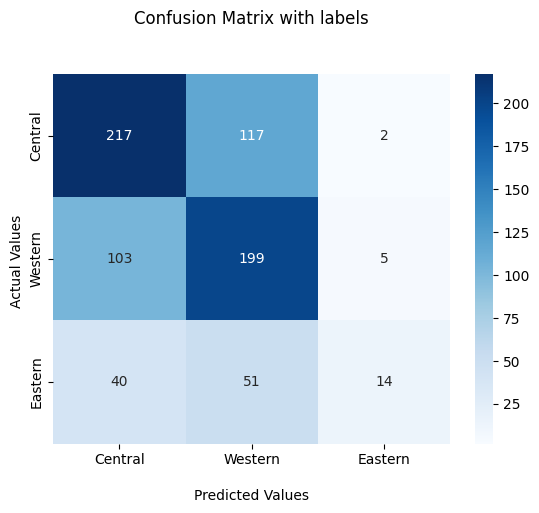

In [42]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

labels = ["Central", "Western", "Eastern"]
cm = confusion_matrix(y_test, yv_p)
print(cm)

ax = sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')

ax.set_title('Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(["Central", "Western", "Eastern"])
ax.yaxis.set_ticklabels(["Central", "Western", "Eastern"])

## Display the visualization of the Confusion Matrix.
plt.show()

In [35]:
precision, recall, fscore, _ = precision_recall_fscore_support(y_test, yv_p, average='weighted')
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F-score: {fscore}")

Precision: 0.4253210452459513
Recall: 0.4959893048128342
F-score: 0.457102531083707


C:\Users\pranj\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### 9. Conclusions:

As a part of the advanced project, we have successfully able to predict the recorded audio signals from which area of London such as Central, Western, or Eastern with an accuracy of 57.48% on the test dataset. 

With the help of the confusion matrix, we can observe that audio signals from the Western and Central areas are predicted better than the Eastern area. True positives and True Negatives are more than False positives and False Negatives for these areas. However, for the Eastern area, we can observe False positives and False Negatives are more. Also, we can observe that the number of samples for the Eastern region is less than the others. Due to this, classifiers are confused about predicting this region.

To improve the accuracy, precision, and F1-score, input data should not be imbalanced. If we could have a greater number of samples, it will help to train the classifier properly. Also, we can try some more feature extractions from given audio signals and try to use different classifiers.
